## Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Classifying MNIST using Multi layer perceptron

### Loading the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Preprocessing the dataset

In [3]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]).astype('float32')
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]).astype('float32')
## Scalin the data
x_train/=255
x_test/=255

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Building the model

In [5]:
#Most common type of model is a stack of layers
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(Dense(256, name='dense_layer', input_shape=(784,), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, name='dense_layer_2', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, name='dense_layer_3', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 10)                1

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [9]:
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
#                               patience=5, min_lr=0.001)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history=model.fit(x_train, y_train, callbacks=[lr_scheduler,early_stopping],validation_split=0.2, epochs=40)

Epoch 1/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3763 - accuracy: 0.8861 - val_loss: 0.1438 - val_accuracy: 0.9558
Epoch 2/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1751 - accuracy: 0.9485 - val_loss: 0.1141 - val_accuracy: 0.9672
Epoch 3/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1411 - accuracy: 0.9597 - val_loss: 0.1076 - val_accuracy: 0.9694
Epoch 4/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1214 - accuracy: 0.9646 - val_loss: 0.1003 - val_accuracy: 0.9717
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1067 - accuracy: 0.9696 - val_loss: 0.0876 - val_accuracy: 0.9736
Epoch 6/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0945 - accuracy: 0.9714 - val_loss: 0.0969 - val_accuracy: 0.9725
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0874 - accuracy: 0.9739 - val_loss: 0.0790 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


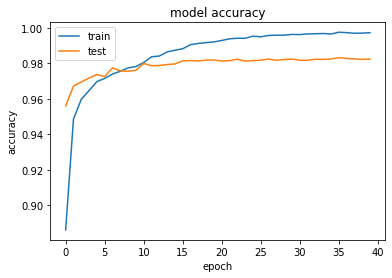

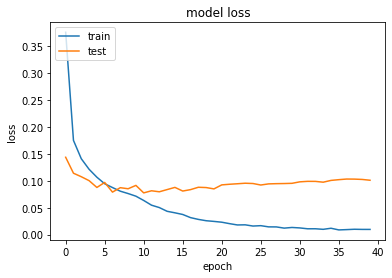

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(history.history.keys())
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0892 - accuracy: 0.9843


[0.08923085778951645, 0.9843000173568726]

## Summary of model working

* Import the libraries that are required to perform the task.
* Download the MNIST dataset from the keras datasets. 
* Preprocess the data so that the model can give accurate results.

    1.   Reshape all the images to fixed size.
    2.   Scale the data which helps to train the model faster and accurate.

* The next step is to build the model. I defined three hidden layers which are followed by a Dropout and then an Output layer.

* The model is compiled with Adam optimizer which has a default learning rate,the loss is categorical crossentropy because we have 10 classes, accuracy is the metric.

* Later I used callbacks such as Early Stopping and LR Scheduler.

  ***EarlyStopping :***  We specify a metric based on which the training stops. Here I used loss as my metric which means the training stops if there is no decrease in the loss for next five epochs.

  ***LR Scheduler :*** This callback is used to change the learning rate when the specified condition is met.

* The final step is to train the model by giving the train dataset and the corresponding labels, epochs, callbacks and the validation split that can be used to verify how our model is performing on unseen dataset.

* Evaluate your model on test dataset.





## Classifying MNIST using CNN Model

### Loading the data

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Preprocessing the data

In [13]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

### ***Building a CNN Model***

In [15]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

### Model Summary

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
# Training the model
model.fit(x_train,y_train,epochs=12, validation_split=0.2)

Epoch 1/12
1500/1500 [==============================] - 20s 12ms/step - loss: 0.1502 - accuracy: 0.9536 - val_loss: 0.0498 - val_accuracy: 0.9861
Epoch 2/12
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0507 - accuracy: 0.9848 - val_loss: 0.0350 - val_accuracy: 0.9901
Epoch 3/12
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0419 - val_accuracy: 0.9888
Epoch 4/12
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0288 - accuracy: 0.9914 - val_loss: 0.0348 - val_accuracy: 0.9913
Epoch 5/12
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 6/12
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.0336 - val_accuracy: 0.9925
Epoch 7/12
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0392 - val_

## ***Evaluating the model***

In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0253 - accuracy: 0.9943


[0.025326885282993317, 0.9943000078201294]

# ***Summary of working of CNN Model***
* Import the libraries that are required to perform the task.
* Download the MNIST dataset from the keras datasets. 
* Preprocess the data so that the model can give accurate results.

    1.   Reshape all the images to fixed size.
    2.   Scale the data which helps to train the model faster and accurate.

* The next step is to build the model. I used a convolutional nueural network(CNN) which has the less number of parameters when compared to the previous multilayer perceptron we built.

* The model is compiled with Adam optimizer which has a default learning rate,the loss is categorical crossentropy because we have 10 classes, accuracy is the metric.

* The model is then trained and evaluated.
* We can see that the CNN model outperforms the multilayer percenptron model. The number of epochs used to train the MLP model are 40 where as CNN is 12. So for unstructured data CNN performs better than MLP model.
